In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Dominio de -1 a 1 en 64 datos debibo a los 6 genes
# 000 000, 000 001, ... , 111 111
x = np.linspace(-1, 1, 64)
y = x**2

print(x)
print(y)

[-1.         -0.96825397 -0.93650794 -0.9047619  -0.87301587 -0.84126984
 -0.80952381 -0.77777778 -0.74603175 -0.71428571 -0.68253968 -0.65079365
 -0.61904762 -0.58730159 -0.55555556 -0.52380952 -0.49206349 -0.46031746
 -0.42857143 -0.3968254  -0.36507937 -0.33333333 -0.3015873  -0.26984127
 -0.23809524 -0.20634921 -0.17460317 -0.14285714 -0.11111111 -0.07936508
 -0.04761905 -0.01587302  0.01587302  0.04761905  0.07936508  0.11111111
  0.14285714  0.17460317  0.20634921  0.23809524  0.26984127  0.3015873
  0.33333333  0.36507937  0.3968254   0.42857143  0.46031746  0.49206349
  0.52380952  0.55555556  0.58730159  0.61904762  0.65079365  0.68253968
  0.71428571  0.74603175  0.77777778  0.80952381  0.84126984  0.87301587
  0.9047619   0.93650794  0.96825397  1.        ]
[1.00000000e+00 9.37515747e-01 8.77047115e-01 8.18594104e-01
 7.62156715e-01 7.07734946e-01 6.55328798e-01 6.04938272e-01
 5.56563366e-01 5.10204082e-01 4.65860418e-01 4.23532376e-01
 3.83219955e-01 3.44923154e-01 3.08641

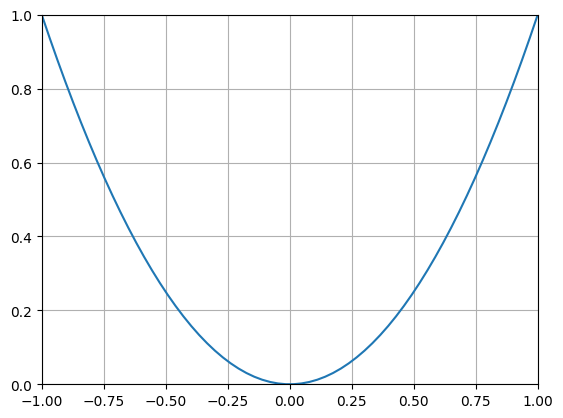

In [3]:
plt.plot(x, y)
plt.axis([-1, 1, 0, 1])
plt.grid(True)
plt.show()

No es necesario tener toda la poblacion generada, habra casos donde no se pueda generar todos y solo necesitamos 10 individuos para empezar la cruza, el objetivo es justamente con una poblacion pequeña alcanzar lo optimo.

# Generar Poblacion

In [5]:
step = 64
valores = np.linspace(-1, 1, step)  # 64 valores entre -1 y 1

def generar_individuo():
    # Índice entre 0 y 63
    idx = random.randint(0, step-1)
    # Decimal a Binario
    binario = format(idx, '06b')
    valor = valores[idx]
    return binario, valor

# Generar padres
padres = []
val = []
for _ in range(10):
    b, v = generar_individuo()
    padres.append(b)
    val.append(v)
    print(f"{b} -> {v}")


101111 -> 0.4920634920634921
000111 -> -0.7777777777777778
010000 -> -0.4920634920634921
000010 -> -0.9365079365079365
110000 -> 0.5238095238095237
011001 -> -0.2063492063492064
011010 -> -0.17460317460317465
111010 -> 0.8412698412698412
001001 -> -0.7142857142857143
111110 -> 0.9682539682539681


Creamos nuestra poblacion inicial junto con su aptitud

In [10]:
df = pd.DataFrame({
    'Bin': padres,
    'Valor': val
})
df['fitness'] = df['Valor']**2

In [8]:
display(df)

,Bin,Valor,fitness
0,101111,0.492063,0.242126
1,000111,-0.777778,0.604938
2,010000,-0.492063,0.242126
3,000010,-0.936508,0.877047
4,110000,0.523810,0.274376
5,011001,-0.206349,0.042580
6,011010,-0.174603,0.030486
7,111010,0.841270,0.707735
8,001001,-0.714286,0.510204
9,111110,0.968254,0.937516


# Seleccion

Con nuestros 10 padres creados procedemos a la cruza  
Para esto haremos 5 parejas y cada una tendra 2 hijos


In [9]:
# Para la cruza se toman 10 padres para hacer 5 parejas
# de esas 5 parejas cada una tendra 2 hijos
# se toman los 10 padres + 10 hijos, se ordenan segun aptitud
# pasan los 10 mas aptos